In [1]:
# N_simulation
from __future__ import division
import numpy as np
# from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy import interpolate 
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import datetime
from datetime import date
import datetime
from myfunctions_water_authority import *
%matplotlib inline

In [2]:
# importing parameters for validation with Reading data 

xval = pd.ExcelFile('C:/Users/meiro/Desktop/GitHub/Model/Meiron_model/data/Parameters.xlsx')
#dfval = xval.parse('Parameters_WaterAuthority',header=None)
dfval = xval.parse('Parameters',header=None)

# assigmment of parameters to values: 
for key,val in zip(dfval.iloc[:][0],dfval.iloc[:][1]):
    exec(key + '=val')
    print(key,val)

n_reactors = 1
Next00 = 4032
dilution = 0

Parameter Indoor_value
umol_to_percent_DW 0.0014
n_days 7
Duration 7
Nint0 1.85
m0 0.15
Nintcrit 4.5
miu 0.04
Nintmax 5.5
Nintmin 0.48
Ks 14
Vmax 60
Z 0.178
KI 35
K0 0.5
Ka 0.05
Topt 18
Tmin 5
Tmax 35
n 5
losses20 0.0016
teta 1.047
Sopt 25
Smin 3
Smax 48
Shigh 30
Slow 12
KN 1.1
dNextoutdt 0.014
dNextindt 0
dmoutdt 0
Next00  4032
dilution 0


In [3]:
# parameters for minimum combined error:
miu = 0.046
losses20 = 0.005
Nintmax = 4.25
Nintcrit = 3.7
dNextoutdt = 0.04
Ks = 24.8
Vmax = 53
KI = 139
K0 = 1.7
Ka = 0.127
Smin = 2.5
Sopt = 27.7
Smax = 46.4
Topt = 22.2
Tmax = 34.4
n = 2

In [4]:
# parameters for minimum combined error - manual adjustment:
miu = 0.04 #0.046
losses20 = 0.004 #0.005
Nintmax = 4.5 #4.25
Nintcrit = 2.3 #2 #3.7
dNextoutdt = 0.004 #0 #0.04
Ks = 15.5 #25.8 #14 #24.8
Vmax = 60 #53 # low because of nitrate
KI = 16 #15.2 #18 #20 #139
K0 = 2.4 #1.5 #1.7
Ka = 0.12 #0.15 #0.127
Smin = 0 #2.5
Sopt = 28 #18
Smax = 45 #45
Topt = 18 #22.2  #21.9 #18
Tmax = 35.9 #34.4
n = 5.1 #2
#Tmin = 4

In [5]:
# parameters for minimum combined error - manual adjustment:
miu = 0.041 #0.046
losses20 = 0.001 #0.005
Nintmax = 4.402 #4.25
Nintcrit = 1.026 #2 #3.7
dNextoutdt = 0.019 #0 #0.04
Ks = 23.193 #25.8 #14 #24.8
Vmax = 150.488 #53 # low because of nitrate
KI = 120.007 #15.2 #18 #20 #139
K0 = 2.848 #1.5 #1.7
Ka = 0.035 #0.15 #0.127
Smin = 0.317 #2.5
Sopt = 26.729 #18
Smax = 47.271 #45
Topt = 24.272 #22.2  #21.9 #18
Tmax = 35.585 #34.4
n = 4.284 #2
#Tmin = 4

#Minimum error for m: 0.146




In [6]:
#algorythem based best combination
miu = 0.037 #0.046
losses20 = 0.004 #0.005
Nintmax = 4.069 #4.25
Nintcrit = 1.431 #2 #3.7
dNextoutdt = 0.035 #0 #0.04
Ks = 26.338 #25.8 #14 #24.8
Vmax = 102.832 #53 # low because of nitrate
KI = 21.921 #15.2 #18 #20 #139
K0 = 0.175 #1.5 #1.7
Ka = 0.174 #0.15 #0.127
Smin = 1.646 #2.5
Sopt = 17.236#18
Smax = 49.819 #45
Topt = 16.011 #22.2  #21.9 #18
Tmax = 32.403 #34.4
n = 3.551 #2
Tmin = 5

#Minimum sum of errors: 0.326
#Best error for m: 0.168
#Best error for N: 0.158

In [7]:
# Import of IMS I and T data
dfI = pd.read_csv('C:/Users/meiro/Desktop/GitHub/Model/Meiron_model/data/ims_data_2020_June_I.csv',encoding= 'unicode_escape',header=None)
dfT = pd.read_csv('C:/Users/meiro/Desktop/GitHub/Model/Meiron_model/data/ims_data_2020_June_T.csv',encoding= 'unicode_escape',header=None)

In [8]:
IV1, TV1,IV1_average,TV1_average = [],[],[],[]
for vali,valT in zip(dfI.iloc[1:1010:1][4],dfT.iloc[1:1010:1][3]):
    IV1.append(float(vali))
    TV1.append(float(valT))
print(len(IV1))
print(len(TV1))
for i in range(1,len(IV1),6):
    IV1_average.append(0.1*0.43*np.mean(IV1[i-1:i+6:1])) # 0.1 shading factor and 0.43 PAR factor
    #IV1_average.append(0.1*0.43*np.mean(IV1[i-1:i+6:1]))
    TV1_average.append(np.mean(TV1[i-1:i+6:1]))
print(len(TV1_average))
print(len(IV1_average))
    
IV2, TV2,IV2_average,TV2_average = [],[],[],[]
for vali,valT in zip(dfI.iloc[1010:1904:1][4],dfT.iloc[1010:1904:1][3]):
    IV2.append(float(vali))
    TV2.append(float(valT))
print(len(IV2))
print(len(TV2))
for i in range(1,len(IV2),6):
    IV2_average.append(0.1*0.43*np.mean(IV2[i-1:i+6:1])) # 0.1 shading factor and 0.43 PAR factor
    #IV2_average.append(0.5*0.43*np.mean(IV2[i-1:i+6:1]))
    TV2_average.append(np.mean(TV2[i-1:i+6:1]))
print(len(TV2_average))
print(len(IV2_average))

1009
1009
168
168
894
894
149
149


In [9]:
# Lists of initial and boundary conditions and empiric results for returns 1-2:
hour2i = int(7*24)+5

t0_all = [0, hour2i]
tf_all = [int(7*24), hour2i + int(6*24-5)]
mi_all = [[1,1,2,2,1,1,2,2,1,1,2,2],[2,2,2,2,2,2,3,3,2,2,3,3]]
mf_real = [[1.3,2.1,4,3,3.8,4.5,7.8,8.1,3.7,3.5,6.9,5.3],[3,2.6,5,4.6,4.4,5.7,5.7,5.8,5.1,4.7,6.55,6.9]]
S_all = [[6, 6, 6, 6, 24, 24, 24, 24, 29, 29, 29, 29],[6, 6, 40, 40, 22.5, 22.5, 22.5, 22.5, 17.5, 17.5,17.5,17.5]]
d_all = [[0,0,0,0,1,1,1,1,2,2,2,2],[0,0,0,0,1,1,1,1,0.5,0.5,0.5,0.5]]
Nint0_all = [[3.01,3.01,3.01,3.01,3.01,3.01,3.01,3.01,3.01,3.01,3.01,3.01],[4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09,4.09]]
Nintf_exps = [[2,3,4,5,7-1,8-1,9-1,10-1,12-2,13-2,14-2,15-2],[2,3,4,5,0,8-1,9-1,10-1,12-2,13-2,14-2,15-2]]
Nintf_real = [[3.12,2.31,2.47,2.82,2.35,2.08,1.56,1.59,2.02,1.86,1.43,1.92],[2.94,3.24,2.76,2.56,0,2.17,2.85,2.33,2.92,2.21,2.76,2.38]]


#functions = [Reading_val, Reading_val_IMS] ###
TV_average = [TV1_average, TV2_average]
IV_average = [IV1_average, IV2_average]
xlabels_all = [['8 June', '11 June','15 June'],['15 June','18 June', '21 June']]
l_all = [[['Brine\n6 PSU','  1:1\n24 PSU','  1:2\n29 PSU'],['Brine\n6 PSU','  1:1\n24 PSU','  1:2\n29 PSU']],[['Brine\n6 PSU','Brine+Salt\n  40 PSU','  1:1\n22.5 PSU','  1:0.5\n17.5 PSU'],['  1:1\n22.5 PSU','  1:0.5\n17.5 PSU']]]

In [10]:
#n = 2

In [11]:
X = [3.74394531e-02, 4.10683594e-03, 4.09912109e+00, 1.47255859e+00, 3.28027344e-02, 2.65498047e+01,1.02850586e+02,
     2.15400391e+01,  1.75166016e-01, 1.74814453e-01,1.04003906e+00, 1.79794922e+01,
     4.90595703e+01, 1.63408203e+01, 3.21474609e+01, 3.14550781e+00]

X = [0.037, 0.004,4.069, 1.431,0.035, 26.338,102.832,21.921,0.175, 0.174,1.646,
     17.236, 49.819, 16.011, 32.403, 3.551]

X = [0.049,0.001,4.241,3.139,0.039,15.996,190.039,121.655,2.516,0.04,2.9,19.59,43.096,20.908,33.385,2.978]

#Best error for m: 0.224
#Best error for N: 0.224

Tmin = 5

p = 0

miu = X[0]
lossess20 = X[1]
Nintmax = X[2]
Nintcrit = X[3]
dNextoutdt = X[4]
Ks = X[5]
Vmax = X[6]
KI = X[7]
K0 = X[8]
Ka = X[9]
Smin = X[10]
Sopt = X[11]
Smax = X[12]
Topt = X[13]
Tmax = X[14]
n = X[15]

Period 1

j = 0
exp: 2
Nintf_exps[k-1][j]: 2
exp: 2
The modeled Nint is: 3.44[% gN /g DW], The measured Nint is 3.12[% gN /g DW]
The calculated error is: -0.103

The modeled m is: 1.0[g FW/bottle], The measured m is 1.3[g FW/bottle]
The calculated error is: 0.231

j = 1
exp: 3
Nintf_exps[k-1][j]: 3
exp: 3
The modeled Nint is: 3.44[% gN /g DW], The measured Nint is 2.31[% gN /g DW]
The calculated error is: -0.489

The modeled m is: 1.0[g FW/bottle], The measured m is 2.1[g FW/bottle]
The calculated error is: 0.524

j = 2
exp: 4
Nintf_exps[k-1][j]: 4
exp: 4
The modeled Nint is: 3.2[% gN /g DW], The measured Nint is 2.47[% gN /g DW]
The calculated error is: -0.296

The modeled m is: 2.0[g FW/bottle], The measured m is 4[g FW/bottle]
The calculated error is: 0.5

j = 3
exp: 5
Nintf_exps[k-1][j]: 5
exp: 5
The modeled Nint is: 3.2[% gN /g DW], The measured Nint is 2.82[% gN /g DW]
The calculated error is: -0.135

The modeled m is: 2.0[g FW/bottle], The measured m is 3[g FW/bottle]
The calcul

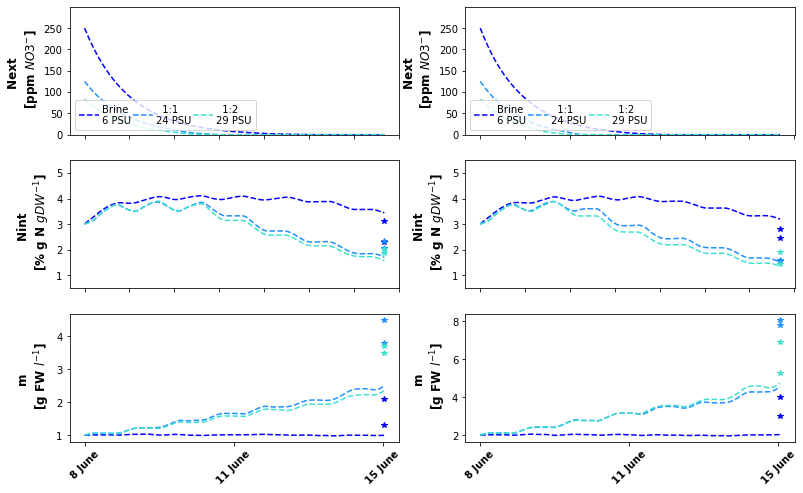

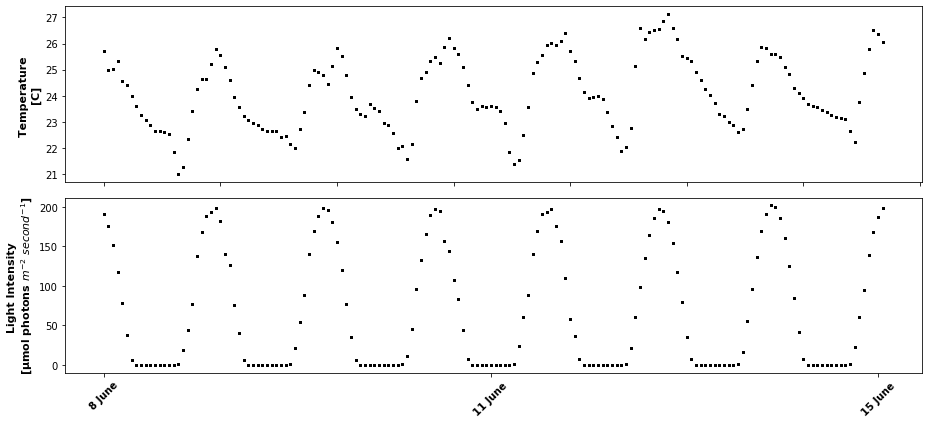

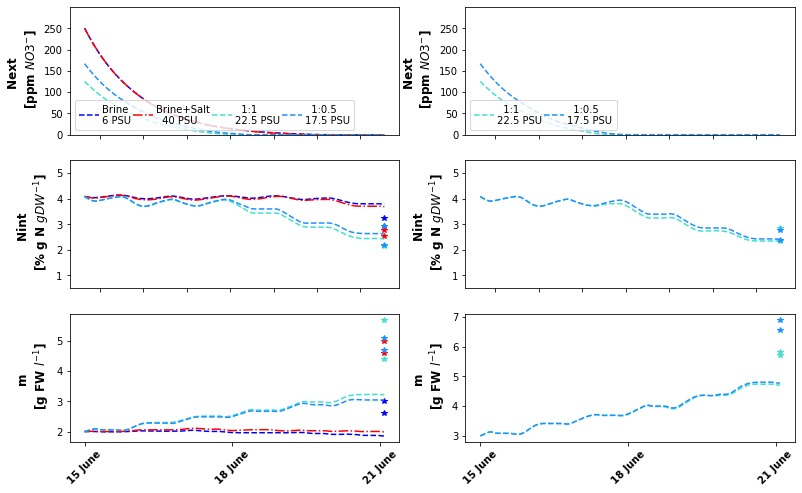

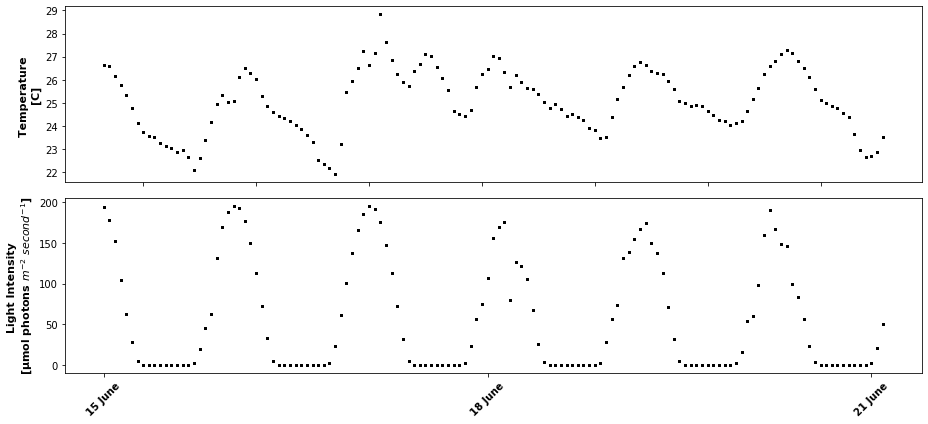

In [12]:
# growth and N dynamics figures (based on IMS data) 
#miu = 0.04
DATA = []
Errors, RMSRE_m = [], []
Errors, RMSRE_Nint = [], []
RMSRE_m_all, RMSRE_Nint_all = [],[]
Square_Errors_m_all,Square_Errors_Nint_all = [],[]
returns = [1, 2]

# model simulation
for k in returns:
    Square_Errors_m = []
    Square_Errors_Nint = []
    
    print('Period ' + str(k) + '\n')
    
    fig, ax = plt.subplots(3,2,figsize=(13,8))
    fig2, ax2 = plt.subplots(2,1,figsize=(13,6))
    
    t0 = t0_all[k-1]
    t = list(range(t0,tf_all[k-1]))
    
    # T Data 
    TV_reduced = TV_average[k-1][0:len(t)]
    f1 = interpolate.interp1d(t, TV_reduced,kind = 'linear')
    
    # I Data
    IV_reduced = IV_average[k-1][0:len(t)]
    f0 = interpolate.interp1d(t, IV_reduced,kind = 'linear')
    
    xlabels = xlabels_all[k-1]
    
    for j in range(len(mi_all[k-1])):
        print('j = ' + str(j))
        if j % 2 == 0:
            NEXT, NINT, M, T = [],[],[],[]

            line = '--'
            S = S_all[k-1][j]
            m0 = 0.15 * mi_all[k-1][j]
            Nint0 = Nint0_all[k-1][j]
            d = d_all[k-1][j]
            Next0 = Next00 / (1 + d)
            x0 = n_reactors*[Next0, Nint0, m0]
            
            if d == 0 and S < 10:
                color = 'blue'
            elif d == max(d_all[k-1]):
                color = 'turquoise'
            elif d != 0 and d != max(d_all[k-1]):
                color = 'dodgerblue'
            elif d == 0 and S > 10:
                color = 'red'
                line = '-.'
                
            # setup initial conditions identical for all reactors
            args = (Nintcrit,Nintmax,Nintmin,Vmax,Ks,KN,miu,S,Z,KI,K0,Ka,Topt,Tmin,Tmax,losses20,
                    teta,Sopt,Smin,Smax,f1,f0,dilution,n,umol_to_percent_DW,dNextoutdt)

            # solve the ODEs using the new syntax
            sol = solve_ivp(Bottles_IMS, [t[0], t[-1]], x0, args=args, t_eval = t)

            # take the solution of the state variables:
            NEXT.append(sol.y[0,:]/1000*62)
            NINT.append(sol.y[1,:])
            M.append(sol.y[2,:])

            T.append(sol.t)

            t = T[0]
            if mi_all[k-1][j] < max(mi_all[k-1]):
                r = 0
            else:
                r = 1
            l = l_all[k-1][r]

            ax[0,r].plot(t,NEXT[-1],linestyle = line,markersize=3.5,color=color)
            ax[0,r].set_ylim([0,Next00*1.2/1000*62])
            ax[1,r].plot(t,NINT[-1],linestyle = line,markersize=3.5,color=color)
            ax[1,r].set_ylim([0.5,5.5])
            ax[2,r].plot(t,M[-1]/0.15,linestyle = line,markersize=3.5,color=color)
            
            col = len(l)
            ax[0,r].legend(l,ncol=col,loc='lower left',fontsize='medium',markerscale=2,columnspacing = 0.2,handletextpad = 0.3)#,edgecolor='white')
        
        data = {'T':T[0],'Next':NEXT[0],'Nint':NINT[0],'m':M[0]}
        DATA.append(data)
        ax[2,r].plot(t[-1],mf_real[k-1][j],'*',markersize = 6,color=color)
        #real Nint data
        
        print('exp: ' + str(j+2))
        print('Nintf_exps[k-1][j]: ' + str(Nintf_exps[k-1][j]))
        if Nintf_exps[k-1][j] == j + 2:
            print('exp: ' + str(j + 2))
            ax[1,r].plot(t[-1],Nintf_real[k-1][j],'*',markersize = 6,color=color)
                
        ax[0,r].set_xticklabels([])
        ax[1,r].set_xticklabels([])
        ax[2,r].set_xticks(t[0:len(t):int(len(t)/2-1)])
        ax[2,r].set_xticklabels([str(i) for i in xlabels], rotation=45,fontsize=10, weight="bold")

        ax[0,r].set_ylabel('Next \n [ppm $NO3^{-}$]', fontsize=12, weight="bold")
        ax[1,r].set_ylabel('Nint \n [% g N $g DW^{-1}$]',fontsize=12, weight="bold")
        ax[2,r].set_ylabel('m \n [g FW $l^{-1}$]',fontsize=12, weight="bold")
        
        plt.tight_layout()

        # plot I and T
        ax2[0].plot(t,TV_reduced,'.',markersize=3,color='black')
        ax2[1].plot(t,IV_reduced,'.',markersize=3,color='k')
            
        ax2[0].set_ylabel('Temperature \n[C]',fontsize=11, weight="bold")
        ax2[1].set_ylabel('Light Intensity \n[Âµmol photons $m^{-2}$ $second^{-1}$]',fontsize=11, weight="bold")

        ax2[0].set_xticklabels([])
        ax2[1].set_xticklabels([])
        ax2[1].set_xticks(t[0:len(t):int(len(t)/2-1)])
        ax2[1].set_xticklabels([str(i) for i in xlabels], rotation=45,fontsize=10, weight="bold")
        
        final_m = round(M [-1][-1],2)
        measured_m = round(mf_real[k-1][j],2)
        error_m = round((measured_m - final_m/0.15) / measured_m,3)
        square_error_m = error_m**2
        Square_Errors_m.append(square_error_m)
        Square_Errors_m_all.append(square_error_m)
        
        final_Nint = round(NINT [-1][-1],2)
        
        if Nintf_exps[k-1][j] == j + 2:
            measured_Nint = round(Nintf_real[k-1][j],2)
            error_Nint = round((measured_Nint - final_Nint) / measured_Nint,3)
            square_error_Nint = error_Nint**2
            Square_Errors_Nint.append(square_error_Nint)
            Square_Errors_Nint_all.append(square_error_Nint)
            print('The modeled Nint is: ' + str(round(final_Nint,2)) + '[% gN /g DW], The measured Nint is ' + str(measured_Nint) + '[% gN /g DW]')
            print('The calculated error is: ' + str(error_Nint) + '\n')
            
            #RMSRE_Nint_all.append((square_error_Nint))
        #RMSRE_m_all.append((square_error_m))
        print('The modeled m is: ' + str(round(final_m/0.15,2)) + '[g FW/bottle], The measured m is ' + str(measured_m) + '[g FW/bottle]')
        print('The calculated error is: ' + str(error_m) + '\n')
        
        

        
        plt.tight_layout()
    
    name = 'fig' + str(k) + 'a.png' 
    name2 = 'fig' + str(k) + 'b.png' 
    fig.savefig(fname=name, dpi=600)
    fig2.savefig(fname=name2, dpi=600)
    
    RMSRE_m.append((np.mean(Square_Errors_m))**0.5)
    #RMSRE_m_all.append((Square_Errors_m))
    print('for return ' + str(k) + ', RMSRE of m = ' + str(round(RMSRE_m[-1],2)) + '\n')
    
    RMSRE_Nint.append((np.mean(Square_Errors_Nint))**0.5)
    
    RMSRE_m_tot = (np.mean(Square_Errors_m_all))**0.5
    RMSRE_Nint_tot = (np.mean(Square_Errors_Nint_all))**0.5
    
    Square_Errors_m, Square_Errors_Nint = [],[]

    print('for return ' + str(k) + ', RMSRE of Nint = ' + str(round(RMSRE_Nint[-1],2)) + '\n')

    print('The total errors are: RMSRE of m = ' + str(round(RMSRE_m_tot,2)) + ' RMSRE of Nint = ' + str(round(RMSRE_Nint_tot,2)) + '\n')
    ...
    ...


In [13]:
# Biomass model error of calibration data

print((np.mean(RMSRE_m_all))**0.5)

#0.23
#0.24
#0.26
#0.3

nan


C:\Users\meiro\Anaconda3new\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\meiro\Anaconda3new\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
# Nint model error of calibration data

print((np.mean(RMSRE_Nint_all))**0.5)

#0.27
#0.29
#0.3
#0.27

nan
